In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis = 1).astype("float64")
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [4]:
X_train_low = pd.DataFrame(X_train["Hits"])
X_test_low = pd.DataFrame(X_test["Hits"]) 

In [11]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 3)

In [12]:
cart_model.fit(X_train_low,y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

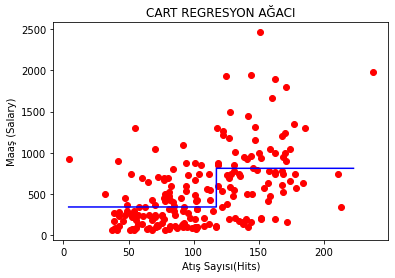

In [13]:
X_grid  = np.arange(min(np.array(X_train_low)),max(np.array(X_test_low)),0.01)
X_grid  = X_grid.reshape((len(X_grid),1))
plt.scatter(X_train_low, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')
plt.title('CART REGRESYON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş (Salary)');

In [ ]:
#